# Heat Map of Crime Rate in Different States of India

#### Importing libraries and loading data 

In [1]:
import numpy as np
import pandas as pd
import shapefile as shp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('data_clubbed.csv', header=None)
sf = shp.Reader("Igismap/Indian_States.shp")

#### Converting shapefile to pandas df

In [3]:
def read_shapefile(sf):
    fields = [x[0] for x in sf.fields][1:]
    records = [list(i) for i in sf.records()]
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

df = read_shapefile(sf)

#### Dividing the data points in different bins and assigning a colour to each bin

In [4]:
def calc_color(data_unique, data, color=None):
        if color   == 1: 
            color_sq =  ['#dadaebFF','#bcbddcF0','#9e9ac8F0','#807dbaF0','#6a51a3F0','#54278fF0']; 
            colors = 'Purples';
        elif color == 2: 
            color_sq = ['#c7e9b4','#7fcdbb','#41b6c4','#1d91c0','#225ea8','#253494']; 
            colors = 'YlGnBu';
        elif color == 3: 
            color_sq = ['#f7f7f7','#d9d9d9','#bdbdbd','#969696','#636363','#252525']; 
            colors = 'Greys';
        elif color == 9: 
            color_sq = ['#ff0000','#ff0000','#ff0000','#ff0000','#ff0000','#ff0000'];
                        
        else:           
            color_sq = ['#ffffd4','#fee391','#fec44f','#fe9929','#d95f0e','#993404']; 
            colors = 'YlOrBr';
        new_data, bins = pd.qcut(data_unique, 6, retbins=True,duplicates='drop', labels=list(range(6)))
        for i in range(len(data)):
            if data[i] < int(bins[1]):
                data[i] = 0
            elif data[i] < int(bins[2]):
                data[i] = 1
            elif data[i] < int(bins[3]):
                data[i] = 2
            elif data[i] < int(bins[4]):
                data[i] = 3
            elif data[i] < int(bins[5]):
                data[i] = 4
            elif data[i] >= int(bins[5]):
                data[i] = 5
        #print(data)
        new_data = data
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val]) 
        if color != 9:
            colors = sns.color_palette(colors, n_colors=6)
            sns.palplot(colors, 0.6);
            for i in range(6):
                print ("\n"+str(i+1)+': '+str(int(bins[i]))+
                       " => "+str(int(bins[i+1])-1))
            print("\n\n   1   2   3   4   5   6")    
        return color_ton, bins;

#### Mapping a colour to each state

In [5]:
def plot_cities_data(sf, title, cities, data_unique=None, data=None,color=None, print_id=False):
 
    color_ton, bins = calc_color(data_unique, data, color)
    df = read_shapefile(sf)
    city_id = []
    for i in cities:
        city_id.append(df[df['st_nm'] == i].index.get_values()[0])
    plot_map_fill_multiples_ids_tone(sf, title, city_id, print_id, color_ton, 
                                     bins, x_lim = None, y_lim = None, figsize = (11,9));

#### Filling the state with the mapped colour

In [6]:
def plot_map_fill_multiples_ids_tone(sf, title, city, print_id, color_ton, 
                                     bins, x_lim = None, y_lim = None, figsize = (11,9)):
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        ax.plot(x, y, 'k')
    #print(color_ton)       
    for id in city:
        shape_ex = sf.shape(id)
        x_lon = np.zeros((len(shape_ex.points),1))
        y_lat = np.zeros((len(shape_ex.points),1))
        for ip in range(len(shape_ex.points)):
            x_lon[ip] = shape_ex.points[ip][0]
            y_lat[ip] = shape_ex.points[ip][1]
        ax.fill(x_lon,y_lat, color_ton[city.index(id)])
        if print_id != False:
            x0 = np.mean(x_lon)
            y0 = np.mean(y_lat)
            plt.text(x0, y0, id, fontsize=10)
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

#### Plotting a heat map using the crime analysis dataset

- Specify the particular year in the 'year' variable 
- Due to difference in State names in the shapefile and dataset, the 'names' list was created
- 'Telangana' was added in the year 2014 and thus there are 2 different names lists


1: 0 => 27

2: 28 => 58

3: 59 => 102

4: 103 => 261

5: 262 => 581

6: 582 => 3708


   1   2   3   4   5   6


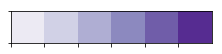

<Figure size 792x648 with 0 Axes>

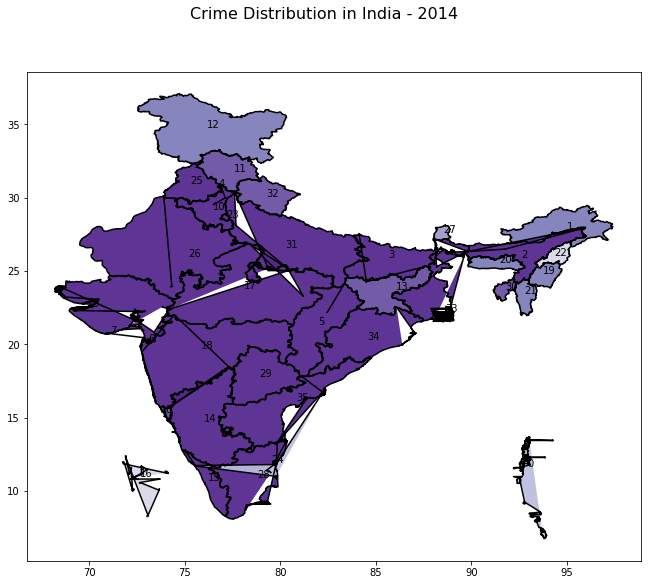

In [7]:
year = 2014

start_range = 0
for i in range(len(dataset)):
    if dataset[1].loc[i] == year:
        start_range = i
        break

end_range = 0   
for i in range(len(dataset)):
    if dataset[1].loc[i] == year:
        end_range += 1
end_range = end_range + start_range        

if year not in [2014,2015]:
    names= ['Andhra Pradesh','Arunanchal Pradesh','Assam','Bihar','Chhattisgarh','Goa','Gujarat','Haryana','Himachal Pradesh',
        'Jammu & Kashmir','Jharkhand','Karnataka','Kerala','Madhya Pradesh','Maharashtra','Manipur','Meghalaya',
        'Mizoram','Nagaland','Odisha','Punjab','Rajasthan','Sikkim','Tamil Nadu','Tripura','Uttar Pradesh',
        'Uttarakhand','West Bengal','Andaman & Nicobar Island','Chandigarh','Dadara & Nagar Havelli','Daman & Diu',
        'NCT of Delhi','Lakshadweep','Puducherry']
else: 
    names= ['Andhra Pradesh','Arunanchal Pradesh','Assam','Bihar','Chhattisgarh','Goa','Gujarat','Haryana','Himachal Pradesh',
        'Jammu & Kashmir','Jharkhand','Karnataka','Kerala','Madhya Pradesh','Maharashtra','Manipur','Meghalaya',
        'Mizoram','Nagaland','Odisha','Punjab','Rajasthan','Sikkim','Tamil Nadu','Telangana','Tripura','Uttar Pradesh',
        'Uttarakhand','West Bengal','Andaman & Nicobar Island','Chandigarh','Dadara & Nagar Havelli','Daman & Diu',
        'NCT of Delhi','Lakshadweep','Puducherry']
    
data_set = set(dataset[12].loc[1:36].tolist())
data_unique = (list(data_set))
data = dataset[12].loc[start_range:end_range].tolist()
print_id = True 
color_pallete = 1 
plot_cities_data(sf, 'Crime Distribution in India - '+str(year), names, data_unique, data, color_pallete, print_id)

<img src="heat-map.gif" alt="GIF of heat maps over the years 2001-2015" title="Heat Map GIF" />